In [41]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# DATASET:

# Classification Model:

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


This is the overall dataset having 8425 rows and 23 columns from which we will have to make two predications for both Rgression and Classification.Our data cotain null values also.some columns have object data also.Here our target vraible will Rainfall and Rain tommorow.

In [43]:
df.shape

(8425, 23)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [45]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


here is the statistical information about the data.

In [46]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

our data has null values. Some columns has half of the rows null values.

In [47]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [48]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        

Date:['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
*********************************************************
Location:['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
*********************************************************
WindGustDir:['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
N      713
SSE    578
S      577
SW     572


In [49]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


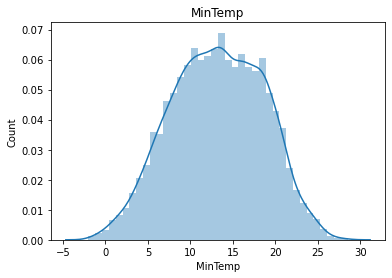

<Figure size 1080x1080 with 0 Axes>

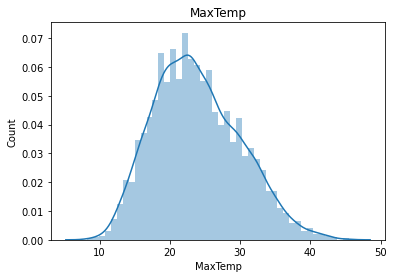

<Figure size 1080x1080 with 0 Axes>

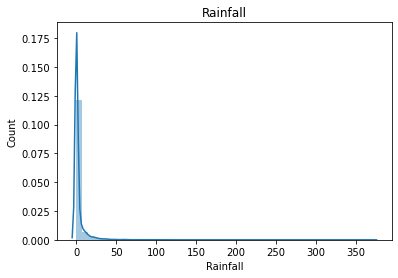

<Figure size 1080x1080 with 0 Axes>

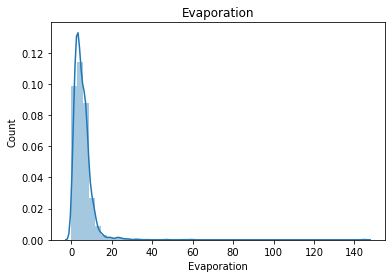

<Figure size 1080x1080 with 0 Axes>

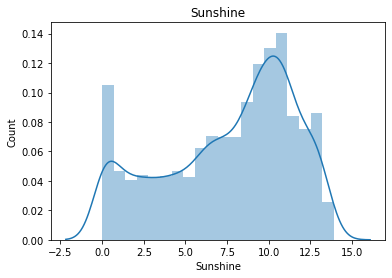

<Figure size 1080x1080 with 0 Axes>

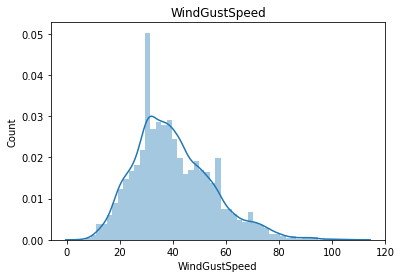

<Figure size 1080x1080 with 0 Axes>

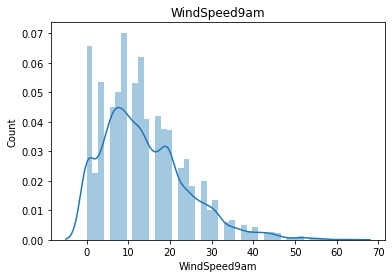

<Figure size 1080x1080 with 0 Axes>

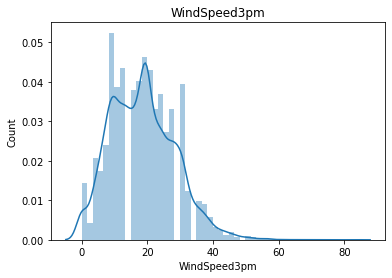

<Figure size 1080x1080 with 0 Axes>

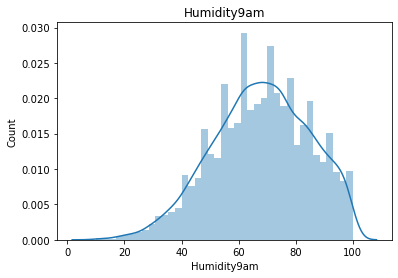

<Figure size 1080x1080 with 0 Axes>

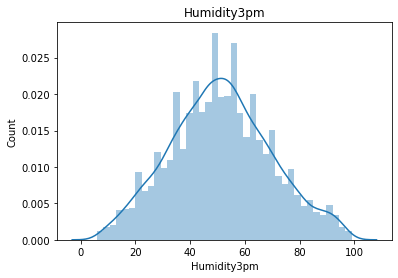

<Figure size 1080x1080 with 0 Axes>

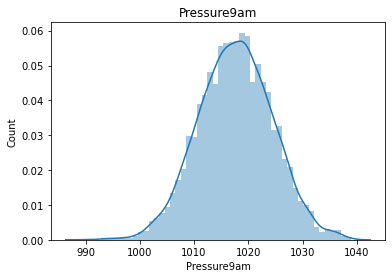

<Figure size 1080x1080 with 0 Axes>

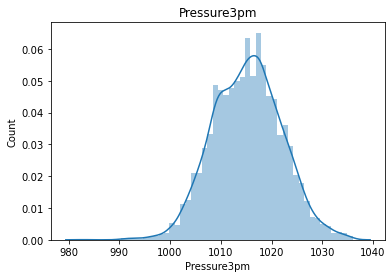

<Figure size 1080x1080 with 0 Axes>

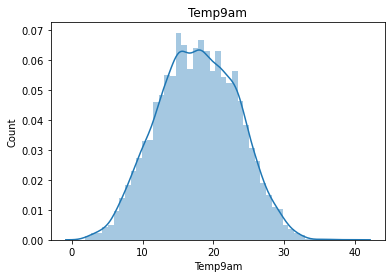

<Figure size 1080x1080 with 0 Axes>

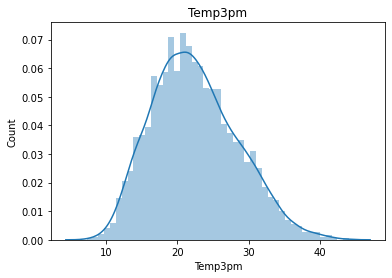

<Figure size 1080x1080 with 0 Axes>

In [51]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

From all the above distributions I can see some continuous column data contain skewness means the data is not normally distributed for those columns like pressure 3pm,pressure9am humidity9am,wind speed9am,windspeed 3pm,sunshine ,wind gust speed.

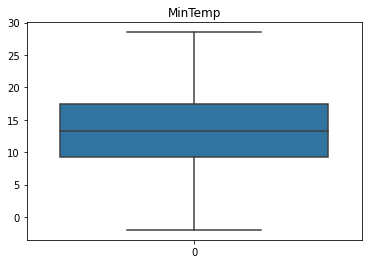

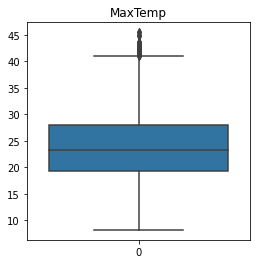

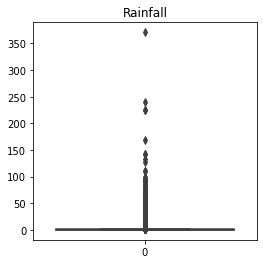

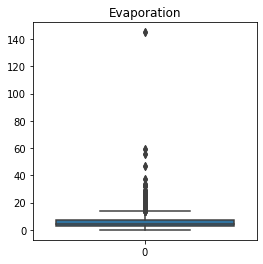

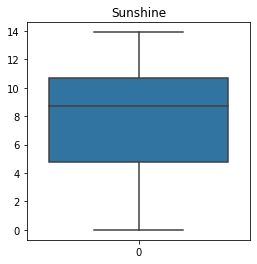

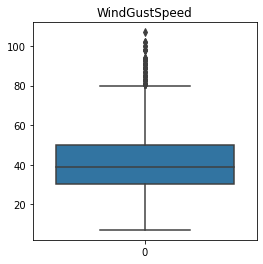

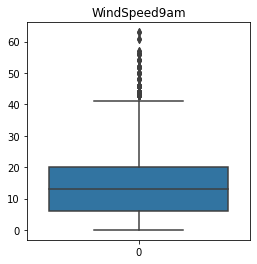

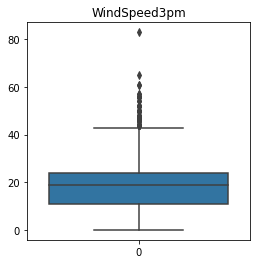

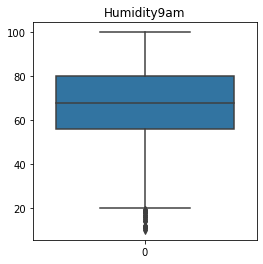

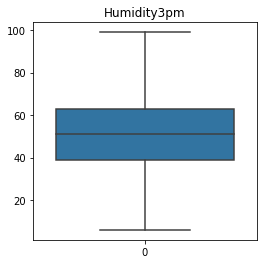

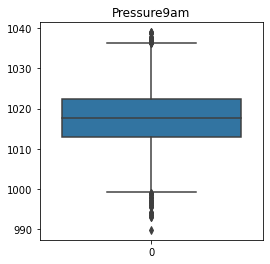

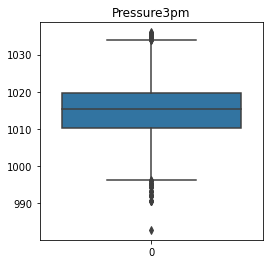

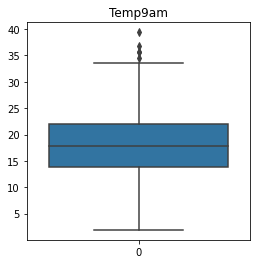

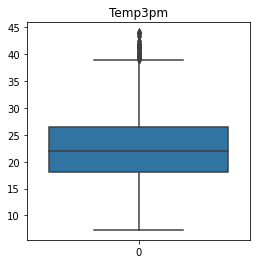

<Figure size 288x288 with 0 Axes>

In [52]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data = data[feature])
    plt.title(feature)
    plt.figure(figsize=(4,4))

Here we can check for outliers in continuous columns.Humidity3pm,sunshine and min temp does not contain outliers rest all the columns contain outliers.

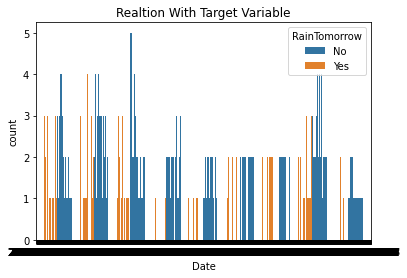

<Figure size 1080x1080 with 0 Axes>

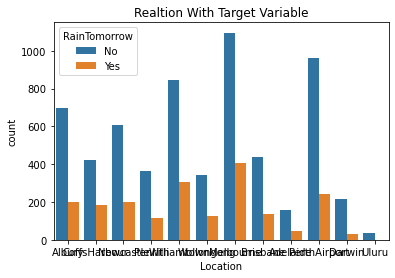

<Figure size 1080x1080 with 0 Axes>

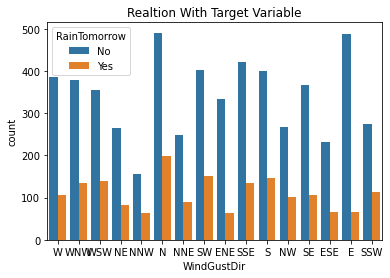

<Figure size 1080x1080 with 0 Axes>

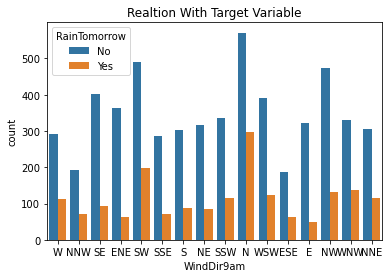

<Figure size 1080x1080 with 0 Axes>

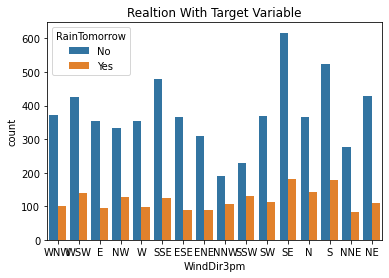

<Figure size 1080x1080 with 0 Axes>

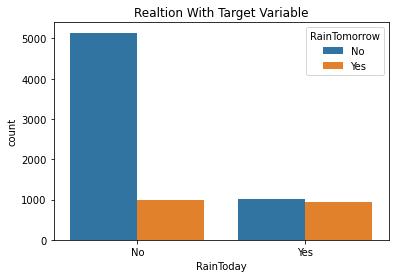

<Figure size 1080x1080 with 0 Axes>

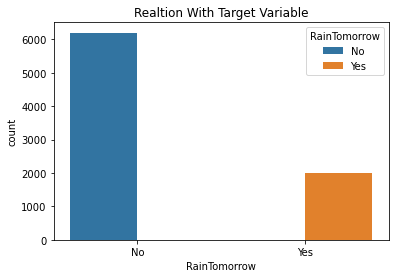

<Figure size 1080x1080 with 0 Axes>

In [53]:
for feature in categorical_feature:
    data=df.copy()
    sns.countplot(df[feature],hue=df['RainTomorrow'])
    plt.title('Realtion With Target Variable')
    plt.figure(figsize=(15,15))
    plt.show()

In [54]:
df['day'] = pd.to_datetime(df.Date,format='%Y/%m/%d').dt.day
df['month'] = pd.to_datetime(df.Date,format='%Y/%m/%d').dt.month
df.drop(['Date'],axis =1,inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,21,6
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,22,6
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,23,6
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,24,6


In [55]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
day                 0
month               0
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,1,12
1,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2,12
2,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,3,12
3,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,4,12
4,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,21,6
8421,9,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,22,6
8422,9,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,23,6
8423,9,7.8,27.0,0.0,NaN,NaN,9,28.0,10,3,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,24,6


In [58]:
df.drop(['Evaporation'],axis=1,inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,1,13.4,22.9,0.6,NaN,13,44.0,13,14,20.0,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,1,12
1,1,7.4,25.1,0.0,NaN,14,44.0,6,15,4.0,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2,12
2,1,12.9,25.7,0.0,NaN,15,46.0,13,15,19.0,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,3,12
3,1,9.2,28.0,0.0,NaN,4,24.0,9,0,11.0,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,4,12
4,1,17.5,32.3,1.0,NaN,13,41.0,1,7,7.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,NaN,0,31.0,9,1,13.0,...,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,21,6
8421,9,3.6,25.3,0.0,NaN,6,22.0,9,3,13.0,...,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,22,6
8422,9,5.4,26.9,0.0,NaN,3,37.0,9,14,9.0,...,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,23,6
8423,9,7.8,27.0,0.0,NaN,9,28.0,10,3,13.0,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,24,6


In [59]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean() )
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean() )
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean() )
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean() )
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean() )
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean() )
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean() )
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean() )
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean() )
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean() )


In [60]:
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].dropna().mode()[0])
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].dropna().mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])



In [61]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
dtype: int64

Now the data does not have any null values.

In [62]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,1,13.4,22.9,0.6,0.0,13,44.0,13,14,20.0,...,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,1,12
1,1,7.4,25.1,0.0,0.0,14,44.0,6,15,4.0,...,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,2,12
2,1,12.9,25.7,0.0,0.0,15,46.0,13,15,19.0,...,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,3,12
3,1,9.2,28.0,0.0,0.0,4,24.0,9,0,11.0,...,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,4,12
4,1,17.5,32.3,1.0,0.0,13,41.0,1,7,7.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,5,12


In [63]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193305,23.859976,2.725982,4.014042,8.746944,40.036320,8.546588,8.066350,13.847646,...,1017.640233,1015.236075,5.265875,5.230742,17.762015,22.442934,0.293175,0.293056,15.741958,6.442136
std,3.162654,5.379488,6.114516,10.319872,4.744297,5.172665,13.781296,5.012591,4.686287,10.128579,...,6.275759,6.217451,2.667166,2.564122,5.608301,5.945849,0.514031,0.513752,8.787354,3.437994
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,...,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,9.300000,19.300000,0.000000,0.000000,4.000000,31.000000,4.000000,4.000000,6.000000,...,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000,8.000000,3.000000
50%,6.000000,13.200000,23.300000,0.000000,0.200000,9.000000,39.000000,9.000000,8.000000,13.000000,...,1017.640233,1015.236075,7.000000,7.000000,17.762015,22.000000,0.000000,0.000000,16.000000,6.000000
75%,8.000000,17.300000,28.000000,0.800000,8.900000,13.000000,48.000000,13.000000,12.000000,20.000000,...,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,1.000000,1.000000,23.000000,9.000000
max,11.000000,28.500000,45.500000,371.000000,13.900000,16.000000,107.000000,16.000000,16.000000,63.000000,...,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2.000000,2.000000,31.000000,12.000000


In [64]:
df.tail(25)

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
8400,9,5.6,19.400000,0.0,0.0,0,43.0,0,2,22.0,...,1029.6,1027.1,7.0,7.0,9.7,18.3,0,0,1,6
8401,9,1.5,19.200000,0.0,0.0,0,37.0,2,2,17.0,...,1030.7,1026.7,7.0,7.0,6.8,17.6,0,0,2,6
8402,9,3.8,19.800000,0.0,0.0,1,39.0,2,0,19.0,...,1028.7,1024.1,7.0,7.0,8.6,18.9,0,0,3,6
8403,9,4.5,18.800000,0.0,0.0,0,31.0,2,0,13.0,...,1026.9,1022.4,7.0,7.0,9.5,18.6,0,0,4,6
8404,9,4.9,20.700000,0.0,0.0,0,37.0,2,2,17.0,...,1027.1,1023.9,7.0,7.0,10.3,19.8,0,0,5,6
8405,9,1.2,20.800000,0.0,0.0,0,43.0,2,0,13.0,...,1029.8,1025.9,7.0,7.0,7.9,19.9,0,0,6,6
8406,9,0.5,21.700000,0.0,0.0,0,43.0,2,1,13.0,...,1029.0,1025.0,7.0,7.0,9.5,20.5,0,0,7,6
8407,9,4.0,20.000000,0.0,0.0,9,39.0,2,2,13.0,...,1030.2,1026.7,7.0,7.0,9.1,19.0,0,0,8,6
8408,9,3.4,19.800000,0.0,0.0,0,43.0,2,0,19.0,...,1031.8,1027.7,7.0,7.0,8.7,18.9,0,0,9,6
8409,9,3.2,18.600000,0.0,0.0,0,46.0,2,0,15.0,...,1031.0,1027.2,7.0,7.0,8.2,17.4,0,0,10,6


Now this the overall  statistical description after cleaning the data.

In [65]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
Location,1.000000,0.116531,0.064268,0.005801,-0.093480,0.005877,0.230018,-0.077362,-0.024786,0.221378,...,-0.032261,-0.020574,0.033864,0.008465,0.118051,0.060570,0.029488,0.028247,-0.002019,-0.082407
MinTemp,0.116531,1.000000,0.717522,0.085723,0.135377,-0.139270,0.230214,-0.144183,-0.156968,0.136872,...,-0.429432,-0.422991,0.017254,-0.038395,0.887119,0.685520,0.080321,0.107930,0.009446,-0.245854
MaxTemp,0.064268,0.717522,1.000000,-0.087710,0.286542,-0.201870,0.139864,-0.246027,-0.189354,0.013314,...,-0.325721,-0.403258,-0.242183,-0.242127,0.866039,0.974506,-0.180840,-0.115563,0.015608,-0.163253
Rainfall,0.005801,0.085723,-0.087710,1.000000,-0.087678,0.054802,0.082628,0.076328,0.039079,0.048812,...,-0.069604,-0.031268,0.133553,0.101161,-0.007351,-0.090768,0.354926,0.166511,-0.013029,-0.016258
Sunshine,-0.093480,0.135377,0.286542,-0.087678,1.000000,-0.263208,0.082179,-0.197625,-0.103347,0.210528,...,-0.001555,-0.033321,-0.574466,-0.545069,0.264455,0.284559,-0.137973,-0.188353,0.007805,0.019281
WindGustDir,0.005877,-0.139270,-0.201870,0.054802,-0.263208,1.000000,0.001020,0.416568,0.511229,-0.157830,...,-0.107236,-0.034450,0.055290,0.055105,-0.161921,-0.212597,0.108446,0.052880,0.001823,0.057764
WindGustSpeed,0.230018,0.230214,0.139864,0.082628,0.082179,0.001020,1.000000,-0.188468,0.052414,0.606107,...,-0.406731,-0.372113,-0.004122,0.031616,0.202277,0.102006,0.100012,0.189549,-0.002454,0.051063
WindDir9am,-0.077362,-0.144183,-0.246027,0.076328,-0.197625,0.416568,-0.188468,1.000000,0.263182,-0.266936,...,0.043742,0.115536,0.128318,0.089085,-0.209828,-0.244958,0.134709,0.017815,0.005116,-0.010684
WindDir3pm,-0.024786,-0.156968,-0.189354,0.039079,-0.103347,0.511229,0.052414,0.263182,1.000000,-0.018887,...,-0.129333,-0.042767,0.079069,0.077689,-0.179123,-0.200317,0.094129,0.024908,-0.000279,0.021322
WindSpeed9am,0.221378,0.136872,0.013314,0.048812,0.210528,-0.157830,0.606107,-0.266936,-0.018887,1.000000,...,-0.174679,-0.138454,-0.032597,0.004855,0.109798,-0.002606,0.054652,0.078929,-0.003067,0.038427


Here I have used log method to remove the skewness in specific columns.

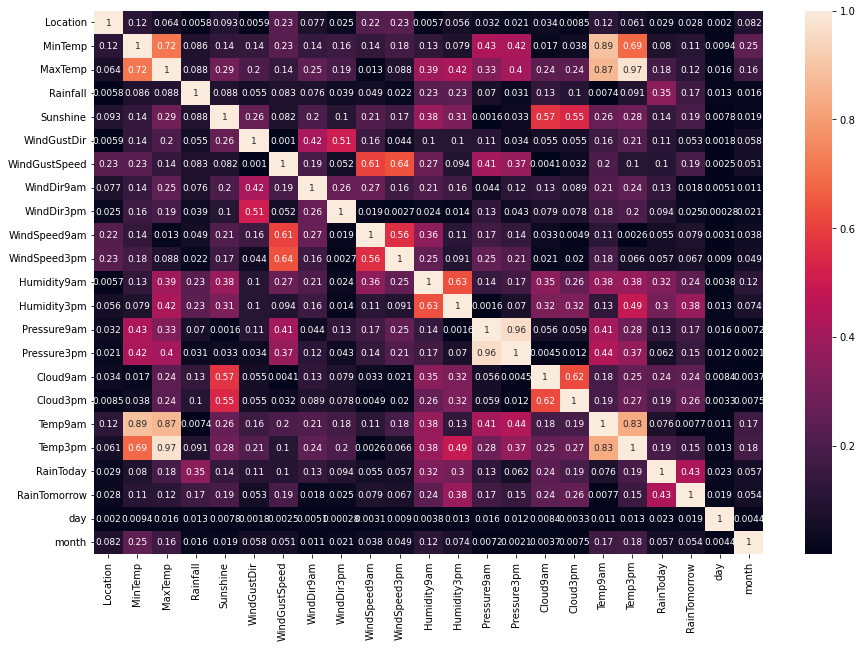

In [66]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':9})
plt.show()



from above corelation heatmap I can say that while predicating for rain tommorrow RainToday is the important features than other features.MaxTemp and MinTemp have mulicolinearity exist. cloud3pm and cloup9am have also multicolinearity. Lets check it by plotting the graph.

Text(0.5, 1.0, 'Scatter plot to show Relation between MaxTemp and MaxTemp')

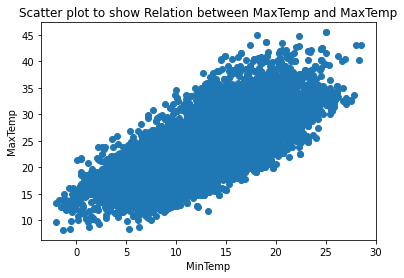

In [67]:
plt.scatter(df['MinTemp'],df['MaxTemp'])
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.title('Scatter plot to show Relation between MaxTemp and MaxTemp')


from above scatterplot we can clearly see that this to features are highly positively corealted so I will drop one of them.I will drop the MinTemp column as its less corealted with target vraible than MaxTemp

Text(0.5, 1.0, 'Scatter plot to show Relation between Cloud9am and Cloud3pm')

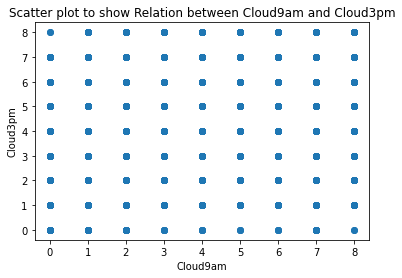

In [68]:
plt.scatter(df['Cloud9am'],df['Cloud3pm'])
plt.xlabel('Cloud9am')
plt.ylabel('Cloud3pm')
plt.title('Scatter plot to show Relation between Cloud9am and Cloud3pm')


Text(0.5, 1.0, 'Scatter plot to show Relation between RainToday and RainTomorrow')

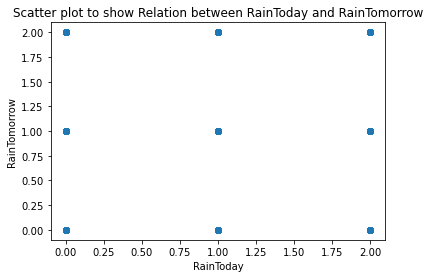

In [69]:
plt.scatter(df['RainToday'],df['RainTomorrow'])
plt.xlabel('RainToday')
plt.ylabel('RainTomorrow')
plt.title('Scatter plot to show Relation between RainToday and RainTomorrow')


In [70]:
df.drop(['Cloud9am','MaxTemp'],axis=1,inplace=True)
df

,Location,MinTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,1,13.4,0.6,0.0,13,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,7.0,16.9,21.8,0,0,1,12
1,1,7.4,0.0,0.0,14,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,7.0,17.2,24.3,0,0,2,12
2,1,12.9,0.0,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,2.0,21.0,23.2,0,0,3,12
3,1,9.2,0.0,0.0,4,24.0,9,0,11.0,9.0,...,16.0,1017.6,1012.8,7.0,18.1,26.5,0,0,4,12
4,1,17.5,1.0,0.0,13,41.0,1,7,7.0,20.0,...,33.0,1010.8,1006.0,8.0,17.8,29.7,0,0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,0.0,0.0,0,31.0,9,1,13.0,11.0,...,24.0,1024.6,1020.3,7.0,10.1,22.4,0,0,21,6
8421,9,3.6,0.0,0.0,6,22.0,9,3,13.0,9.0,...,21.0,1023.5,1019.1,7.0,10.9,24.5,0,0,22,6
8422,9,5.4,0.0,0.0,3,37.0,9,14,9.0,9.0,...,24.0,1021.0,1016.8,7.0,12.5,26.1,0,0,23,6
8423,9,7.8,0.0,0.0,9,28.0,10,3,13.0,7.0,...,24.0,1019.4,1016.5,2.0,15.1,26.0,0,0,24,6


In [71]:
df.RainTomorrow.value_counts()

0    6195
1    1991
2     239
Name: RainTomorrow, dtype: int64

we will have to make this count balanced

# Scaling and Model Building: 

In [72]:
X= df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [73]:
X.tail(10)

,Location,MinTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,day,month
8415,9,5.2,0.0,0.0,0,24.0,9,0,11.0,11.0,53.0,24.0,1023.8,1020.0,7.0,12.3,23.3,0,16,6
8416,9,6.4,0.0,0.0,2,31.0,8,2,15.0,17.0,53.0,25.0,1025.8,1023.0,7.0,11.2,23.1,0,17,6
8417,9,8.0,0.0,0.0,2,41.0,9,0,19.0,26.0,56.0,32.0,1028.1,1024.3,7.0,11.6,20.0,0,18,6
8418,9,7.4,0.0,0.0,0,35.0,2,0,15.0,17.0,63.0,33.0,1027.2,1023.3,7.0,11.0,20.3,0,19,6
8419,9,3.5,0.0,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,7.0,9.4,20.9,0,20,6
8420,9,2.8,0.0,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,10.1,22.4,0,21,6
8421,9,3.6,0.0,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,10.9,24.5,0,22,6
8422,9,5.4,0.0,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,12.5,26.1,0,23,6
8423,9,7.8,0.0,0.0,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,2.0,15.1,26.0,0,24,6
8424,9,14.9,0.0,0.0,16,39.0,2,2,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,15.0,20.9,0,25,6


In [74]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    2
Name: RainTomorrow, Length: 8425, dtype: int32

In [75]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y)

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [78]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)
   

accuracy 0.8219584569732937 random_state 0
accuracy 0.8219584569732937 random_state 0
accuracy 0.8100890207715133 random_state 1
accuracy 0.8213649851632048 random_state 2
accuracy 0.8106824925816024 random_state 3
accuracy 0.8219584569732937 random_state 4
accuracy 0.8166172106824926 random_state 5
accuracy 0.8148367952522255 random_state 6
accuracy 0.8100890207715133 random_state 7
accuracy 0.800593471810089 random_state 8
accuracy 0.8213649851632048 random_state 9
accuracy 0.8225519287833828 random_state 10
accuracy 0.8225519287833828 random_state 10
accuracy 0.8332344213649852 random_state 11
accuracy 0.8332344213649852 random_state 11
accuracy 0.8213649851632048 random_state 12
accuracy 0.8124629080118695 random_state 13
accuracy 0.8314540059347181 random_state 14
accuracy 0.8189910979228486 random_state 15
accuracy 0.8106824925816024 random_state 16
accuracy 0.8112759643916914 random_state 17
accuracy 0.8124629080118695 random_state 18
accuracy 0.827893175074184 random_state 19
a

In [79]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.8415430267062315 Random State 192


In [80]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predt))
print(confusion_matrix(y_test,predt))
print(classification_report(y_test,predt))

Accuracy 0.8356083086053413
[[1104  119    9]
 [ 127  264    3]
 [  11    8   40]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1232
           1       0.68      0.67      0.67       394
           2       0.77      0.68      0.72        59

    accuracy                           0.84      1685
   macro avg       0.78      0.75      0.76      1685
weighted avg       0.83      0.84      0.84      1685



In [81]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier()
rt.fit(x_train,y_train)
prert = rt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prert))
print(confusion_matrix(y_test,prert))
print(classification_report(y_test,prert))

Accuracy 0.8777448071216617
[[1185   44    3]
 [ 140  254    0]
 [  12    7   40]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1232
           1       0.83      0.64      0.73       394
           2       0.93      0.68      0.78        59

    accuracy                           0.88      1685
   macro avg       0.88      0.76      0.81      1685
weighted avg       0.88      0.88      0.87      1685



In [82]:
from sklearn.svm import SVC

st = SVC()
st.fit(x_train,y_train)
prest = st.predict(x_test)
print('Accuracy',accuracy_score(y_test,prest))
print(confusion_matrix(y_test,prest))
print(classification_report(y_test,prest))

Accuracy 0.8308605341246291
[[1183   43    6]
 [ 202  191    1]
 [  23   10   26]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1232
           1       0.78      0.48      0.60       394
           2       0.79      0.44      0.57        59

    accuracy                           0.83      1685
   macro avg       0.80      0.63      0.69      1685
weighted avg       0.82      0.83      0.82      1685



In [83]:
from sklearn.ensemble import AdaBoostClassifier

at = AdaBoostClassifier()
at.fit(x_train,y_train)
preat = at.predict(x_test)
print('Accuracy',accuracy_score(y_test,preat))
print(confusion_matrix(y_test,preat))
print(classification_report(y_test,preat))


Accuracy 0.7940652818991097
[[1124  101    7]
 [ 197  194    3]
 [  22   17   20]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1232
           1       0.62      0.49      0.55       394
           2       0.67      0.34      0.45        59

    accuracy                           0.79      1685
   macro avg       0.71      0.58      0.62      1685
weighted avg       0.78      0.79      0.78      1685



In [84]:
from sklearn.ensemble import BaggingClassifier

bt = BaggingClassifier()
bt.fit(x_train,y_train)
prebt = bt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prebt))
print(confusion_matrix(y_test,prebt))
print(classification_report(y_test,prebt))


Accuracy 0.8724035608308606
[[1182   48    2]
 [ 147  247    0]
 [  14    4   41]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1232
           1       0.83      0.63      0.71       394
           2       0.95      0.69      0.80        59

    accuracy                           0.87      1685
   macro avg       0.89      0.76      0.81      1685
weighted avg       0.87      0.87      0.87      1685



In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
prekt = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prekt))
print(confusion_matrix(y_test,prekt))
print(classification_report(y_test,prekt))


Accuracy 0.8023738872403561
[[1139   86    7]
 [ 200  192    2]
 [  28   10   21]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1232
           1       0.67      0.49      0.56       394
           2       0.70      0.36      0.47        59

    accuracy                           0.80      1685
   macro avg       0.73      0.59      0.64      1685
weighted avg       0.79      0.80      0.79      1685



In [86]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
prext = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prext))
print(confusion_matrix(y_test,prext))
print(classification_report(y_test,prext))


Accuracy 0.8023738872403561
[[1139   86    7]
 [ 200  192    2]
 [  28   10   21]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1232
           1       0.67      0.49      0.56       394
           2       0.70      0.36      0.47        59

    accuracy                           0.80      1685
   macro avg       0.73      0.59      0.64      1685
weighted avg       0.79      0.80      0.79      1685



# CROSS VALIDATION

In [87]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(bt,X_scaled,y,cv=3)
print("Cross Validation Score for Bagging Classifier Model is:-",scr.mean())

Cross Validation Score for Bagging Classifier Model is:- 0.7439753664537099


In [88]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rt,X_scaled,y,cv=3)
print("Cross Validation Score for Random Forest Classifier Model is:-",scr.mean())

Cross Validation Score for Random Forest Classifier Model is:- 0.7394584020904182


In [89]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt,X_scaled,y,cv=3)
print("Cross Validation Score for Decision Tree Classifier is:-",scr.mean())

Cross Validation Score for Decision Tree Classifier is:- 0.6803501717617061


In [90]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X_scaled,y,cv=3)
print("Cross Validation Score for Logistic Classification Model is:-",scr.mean())

Cross Validation Score for Logistic Classification Model is:- 0.7897909547962948


In [91]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(at,X_scaled,y,cv=3)
print("Cross Validation Score for AdaboostClassifier Model is:-",scr.mean())

Cross Validation Score for AdaboostClassifier Model is:- 0.6126900729813985


In [92]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgb,X_scaled,y,cv=3)
print("Cross Validation Score for XGB Model is:-",scr.mean())

Cross Validation Score for XGB Model is:- 0.6966087923872427


# HyperPatameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : np.logspace(-4, 4, 20),
             'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
             'max_iter' : [100, 1000,2500, 5000]}]
    


In [94]:
GCV = GridSearchCV(LogisticRegression(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

In [95]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [96]:
GCV.best_estimator_

LogisticRegression(C=0.0001, penalty='none')

In [97]:
GCV_pred = GCV.best_estimator_.predict(x_test)
print(accuracy_score(y_test,GCV_pred))
print(confusion_matrix(y_test,GCV_pred))

0.7946587537091988
[[1137   85   10]
 [ 212  179    3]
 [  21   15   23]]


The model is giving 80% accuracy after applying hyperparameter tuning.

In [100]:
import pickle
file = open('Rainfall.pkl', 'wb')
pickle.dump(GCV.best_estimator_, file)
model=open('Rainfall.pkl', 'rb')
Rainfall_model=pickle.load(model)